In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Watchlists:

## 1. Opening watchlists:

In [37]:
navid_watchlist = pd.read_csv('navid-watchlist.csv')
navid_watchlist.head()

,id,Name,Year
0,93573,May Days,1978
1,240928,With the Blood of Others,1974
2,202934,They Kill Me If I Don't Work and If I Work The...,1974
3,156311,Class of Struggle,1969
4,51326,The Bridge on the River Kwai,1957


In [38]:
hannah_watchlist = pd.read_csv('hannah-watchlist.csv')
hannah_watchlist.head()

,id,Name,Year
0,51940,Three Colours: Red,1994
1,436873,Climax,2018
2,51190,Irreversible,2002
3,29041,Enter the Void,2009
4,50967,I Stand Alone,1998


## 3. Getting shared movies of both watchlists:

In [39]:
merged_watchlist = pd.merge(hannah_watchlist, navid_watchlist)

In [40]:
print(merged_watchlist)

        id                                       Name  Year
0   307298                        The Disaster Artist  2017
1    51613                             The Green Mile  1999
2    51714                                      Alien  1979
3    51686                         The Straight Story  1999
4    42089                      A Brighter Summer Day  1991
5    51024                        The Virgin Suicides  1999
6    50717                           Marie Antoinette  2006
7    45585                                       Tess  1979
8    51271                             A Few Good Men  1992
9    51366                              Almost Famous  2000
10  311942                               Cameraperson  2016
11   97672                               U.S. Go Home  1994
12   35988                                      Yi Yi  2000
13   49468  Women on the Verge of a Nervous Breakdown  1988
14   51618                       Being John Malkovich  1999
15  348772                              

In [139]:
merged_watchlist.to_csv('merged-watchlist.csv', index=False)

## 4. Watchlist Analysis

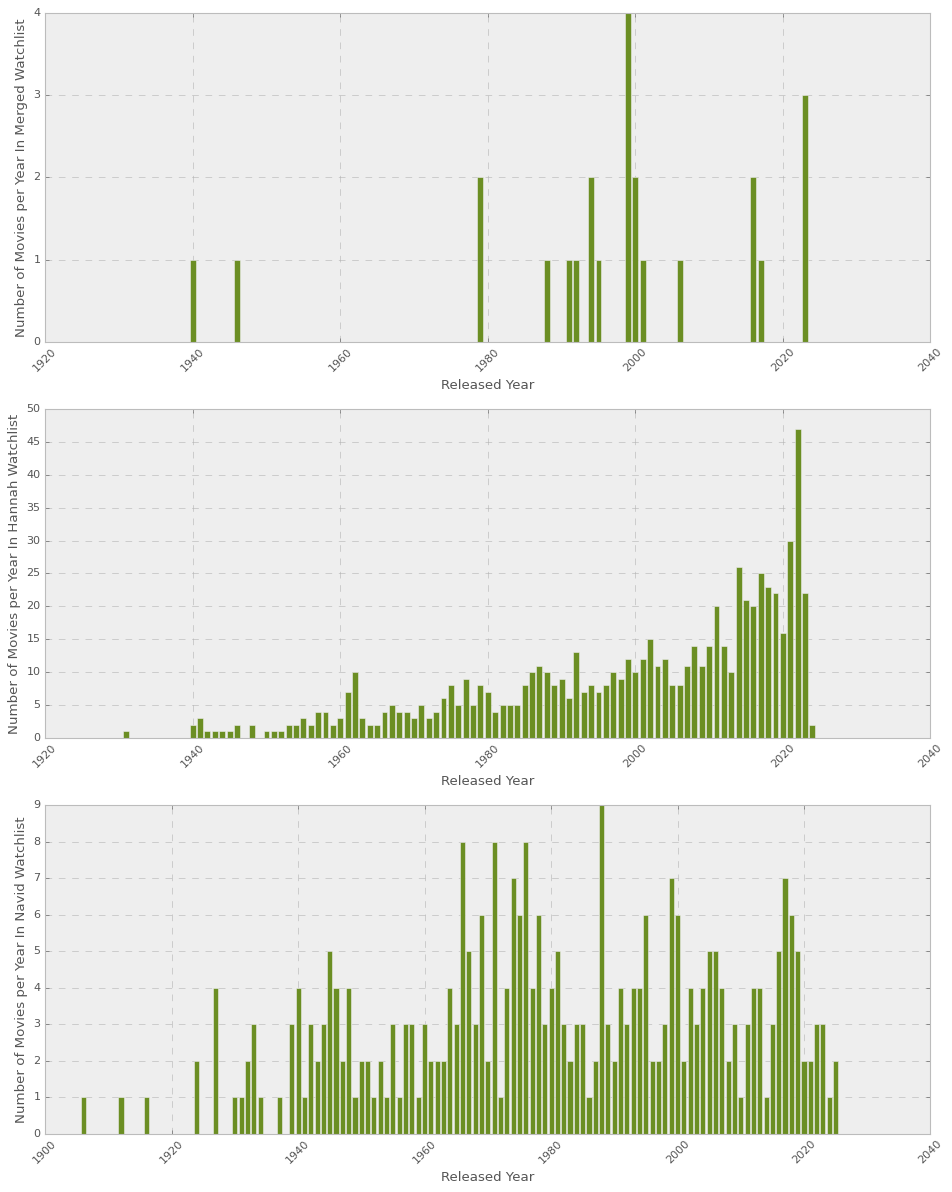

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

i = 0

# Set up a figure and a set of subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))  # Adjust nrows and ncols as needed
names = ['Merged', 'Hannah', 'Navid']
# Plot each DataFrame
for ax, df in zip(axs, [merged_watchlist, hannah_watchlist, navid_watchlist]):
    movie_counts = df.groupby('Year').size()
    
    # Plotting
    ax.bar(movie_counts.index, movie_counts.values, color='olivedrab')
    ax.set_xlabel("Released Year")
    ax.set_ylabel(f"Number of Movies per Year In {names[i]} Watchlist")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='x', rotation=45)
    i += 1
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.style.use('bmh')
plt.xticks(rotation=45)

# Display the plot
plt.show()


## 5. Watched Analysis

In [149]:
navid_watched = pd.read_csv('navid-watched.csv')

In [150]:
navid_watched.head()

,id,Name,Release_Year,user_rate
0,139477,Sallie Gardner at a Gallop,1878,NaN
1,84973,Newark Athlete,1891,NaN
2,115755,Falling Cat,1894,NaN
3,136283,"Luis Martinetti, Contortionist",1894,NaN
4,85095,Edison Kinetoscopic Record of a Sneeze,1894,NaN


In [151]:
hannah_watched = pd.read_csv('hannah-watched.csv')
hannah_watched.head()

,id,Name,Release_Year,user_rate
0,49887,Wuthering Heights,1939,2.5
1,51578,Psycho,1960,3.0
2,51196,Spartacus,1960,NaN
3,51987,2001: A Space Odyssey,1968,4.5
4,51867,A Clockwork Orange,1971,3.0


In [161]:
both_watched = pd.merge(hannah_watched, navid_watched,  on=['id','Name', "Release_Year"])
both_watched.rename(columns={'user_rate_x':'Hannah_Rate', 'user_rate_y':'Navid_Rate'}, inplace=True)

In [163]:
both_watched.head()

,id,Name,Release_Year,Hannah_Rate,Navid_Rate
0,49887,Wuthering Heights,1939,2.5,3.0
1,51578,Psycho,1960,3.0,4.5
2,51987,2001: A Space Odyssey,1968,4.5,4.5
3,51867,A Clockwork Orange,1971,3.0,4.0
4,51818,The Godfather,1972,4.5,5.0


In [209]:
df = hannah_watched[hannah_watched['user_rate'] == 0.5]
movie_counts = df.groupby('Release_Year').size()
movie_counts.head()

Release_Year
1988    1
2009    1
2016    1
2021    1
dtype: int64

In [208]:
navid_watched[['Release_Year','user_rate']].groupby('Release_Year').sum()

,user_rate
Release_Year,
1878,0.0
1891,0.0
1894,0.0
1895,0.0
1896,0.0
...,...
2020,40.0
2021,69.0
2022,29.0


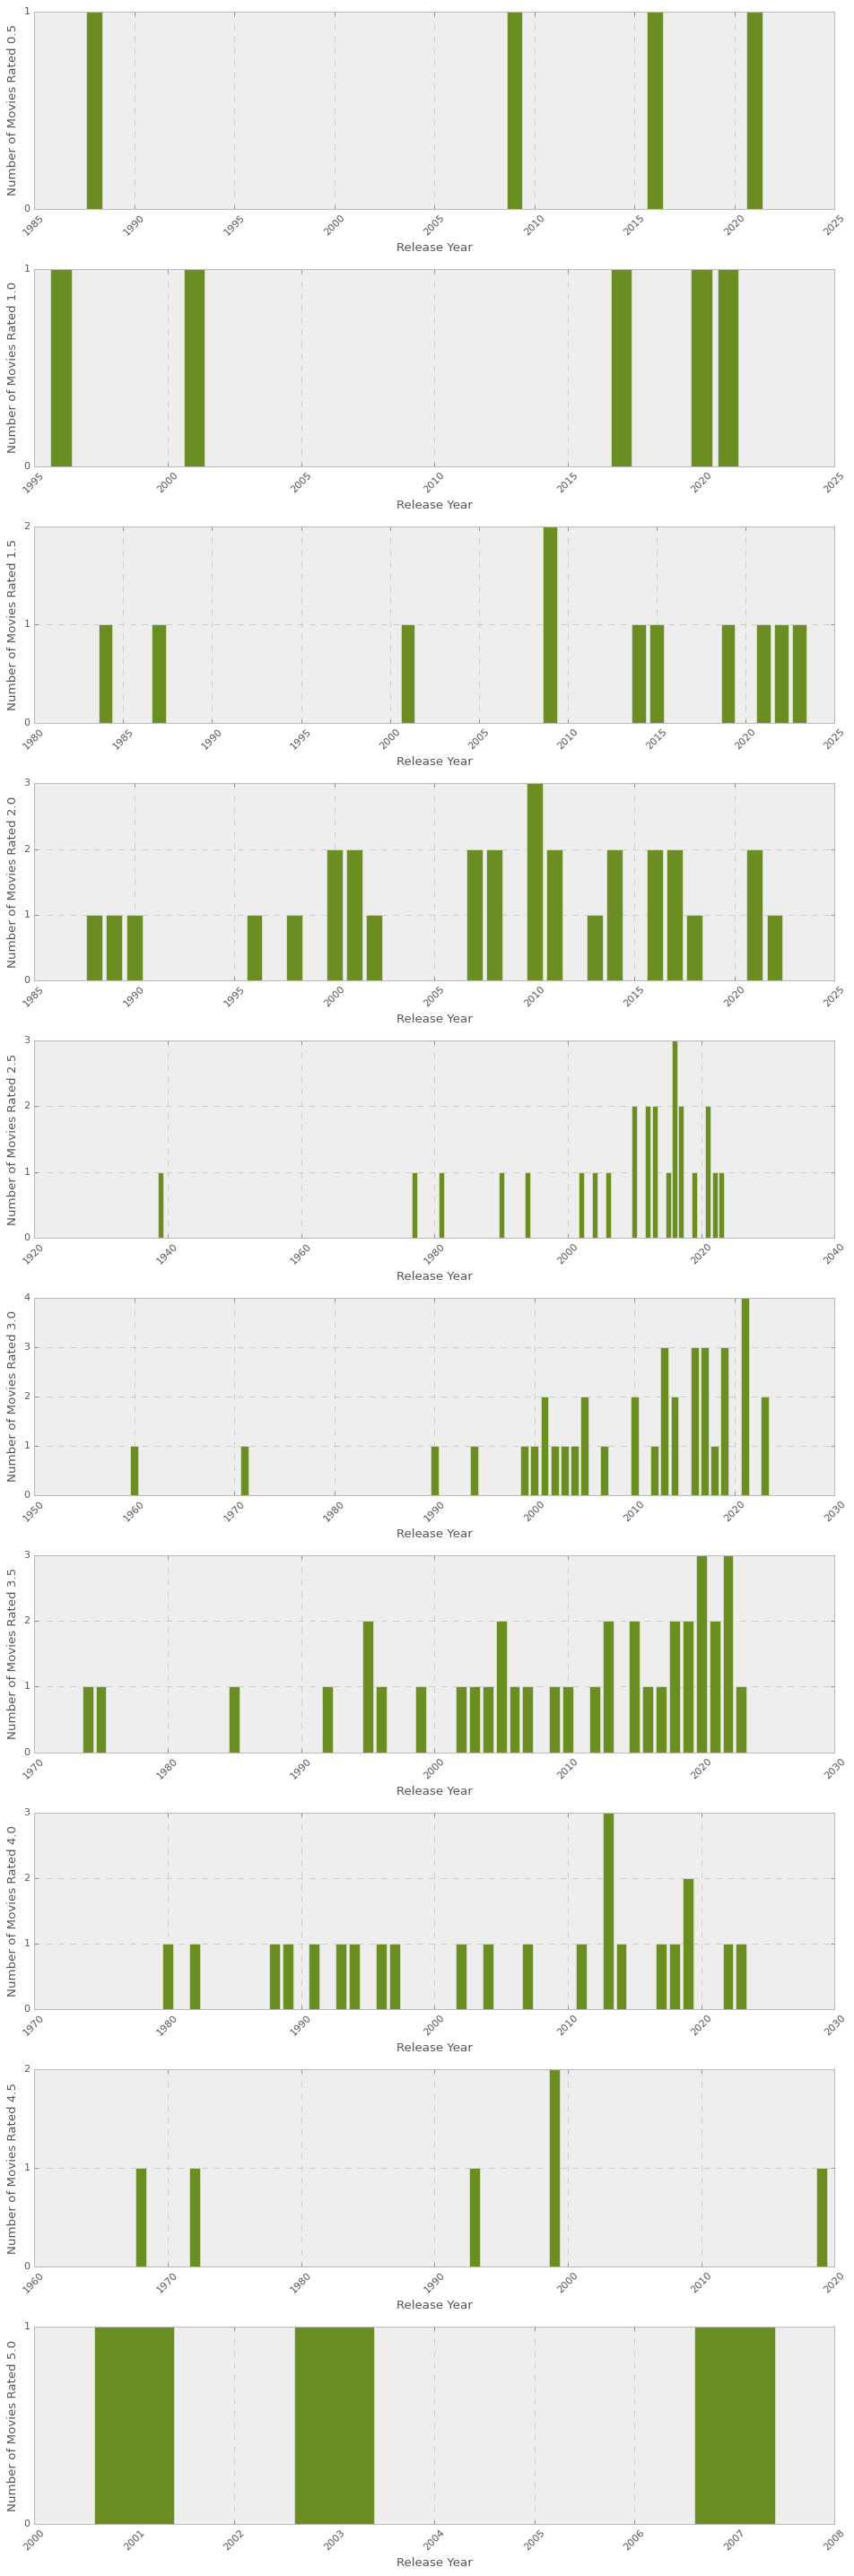

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

i = 0.5

def custom_format(x, pos):
    return str(int(x))
# Set up a figure and a set of subplots
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(12, 36))  # Adjust nrows and ncols as needed
# Plot each DataFrame
for ax in axs:
    df = hannah_watched[hannah_watched['user_rate'] == i]
    movie_counts = df.groupby('Release_Year').size()    
    # Plotting
    ax.bar(movie_counts.index, movie_counts.values, color='olivedrab')
    ax.set_xlabel("Release Year")
    ax.set_ylabel(f"Number of Movies Rated {i}")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(custom_format))
    ax.tick_params(axis='x', rotation=45)
    i += 0.5
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.style.use('bmh')
plt.xticks(rotation=45)

# Display the plot
plt.show()

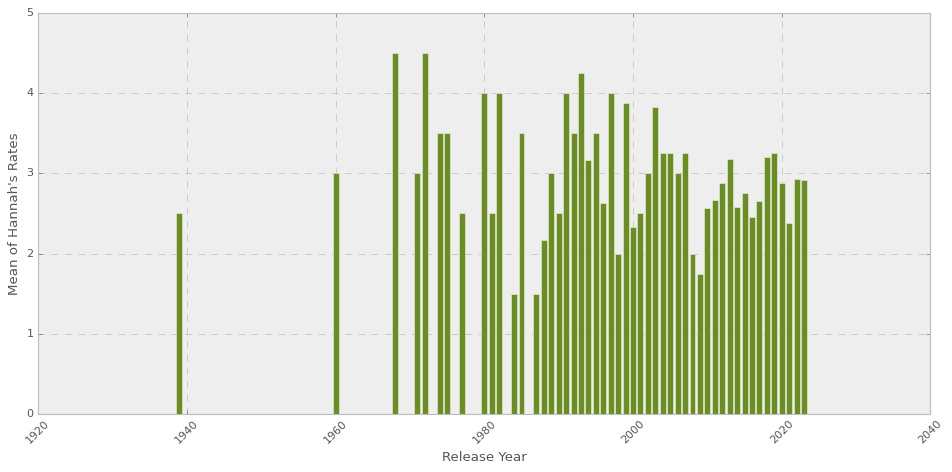

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def custom_format(x, pos):
    return str(int(x))
# Set up a figure and a set of subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))  # Adjust nrows and ncols as needed
# Plot each DataFrame

df = hannah_watched[['Release_Year', 'user_rate']]
movie_counts = df.groupby('Release_Year').mean()
# Plotting
ax.bar(movie_counts.index, movie_counts.user_rate, color='olivedrab')
ax.set_xlabel("Release Year")
ax.set_ylabel(f"Mean of Hannah's Rates")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mtick.FuncFormatter(custom_format))
ax.tick_params(axis='x', rotation=45)
    
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.style.use('bmh')
plt.xticks(rotation=45)

# Display the plot
plt.show()